# hw07

## Metadata

```{yaml}
Name:    hw07
URL:     https://github.com/tslever/DS5100-2022-08-tsl2b/blob/main/lessons/M07/hw07.ipynb
Course:  DS 5100
Term:    Fall 2022 Online
Module:  M07: Python Classes
Topic:   Stock Class
Author:  Tom Lever
Net ID:  tsl2b
Created: 12 October 2022
Updated: 13 October 2022
```

## Overview

In this assignment, you will define a class and use it to perform the requested tasks.

Before answering the questions, read the market data from `apple_data.csv` into a Pandas data frame.


## Setting Up

In [1]:
import numpy as np
import pandas as pd

## Preparing the Data

Read in the data set from the attached file `apple_data.csv` using `pd.read_csv()`.

In [2]:
data_frame_of_date_and_adjusted_closing_price = pd.read_csv('apple_data.csv')
print(data_frame_of_date_and_adjusted_closing_price.shape[0])
data_frame_of_date_and_adjusted_closing_price

135


,date,adj_close
0,2020-01-02,298.829956
1,2020-01-03,295.924713
2,2020-01-06,298.282715
3,2020-01-07,296.879883
4,2020-01-08,301.655548
...,...,...
130,2020-07-09,383.010010
131,2020-07-10,383.679993
132,2020-07-13,381.910004
133,2020-07-14,388.230011


## Task 1

(5 points)

Define a class with these features:

**Class Name**: `Stock`

**Attributes**:
- `ticker`: a string to hold the stock symbol
- `sector`: a string to hold the sector name
- `prices`: a dataframe to hold the prices for the stock

**Methods**:
- `print_sector` to just print out the sector string.
- `get_row_count` to count the number of rows in the price dataframe. Set an attribute "price_records" equal to this count.
-`__init__` to build objects. Initialize with the three attribute values passed to the constructor.

In [3]:
class Stock():
    
    def __init__(self, ticker_to_use, sector_to_use, prices_to_use):
        self.ticker = ticker_to_use
        self.sector = sector_to_use
        self.prices = prices_to_use
        
    def print_sector(self):
        print(self.sector)
        
    def get_row_count(self):
        self.price_records = self.prices.shape[0]
        return self.price_records

# Task 2

(1 PT) 

Create an instance of your class with the these initial values: 
- `ticker`: 'AAPL'
- `sector`: 'technology'
- `prices`: _the imported price dataframe_
          
Then Use the dot operator to print the stock's ticker. 

In [4]:
apple_stock = Stock('AAPL', 'technology', data_frame_of_date_and_adjusted_closing_price)
apple_stock.ticker

'AAPL'

# Task 3 

(1 PT) 

Use the `print_sector()` method to print the sector.

In [5]:
apple_stock.print_sector()

technology


# Task 4 

(2 PTS) 

Use the `get_row_count()` method to compute the number of price records and set price_records.

Use the dot operator to access the stock's price_records, printing the result.

In [6]:
print(apple_stock.get_row_count())
apple_stock.price_records

135


135

# Task 5

(1 PT) 

Add a new column called `'month'` to the `prices` attribute and put the month number there. 

Hint: You can use `.apply()` with a lambda function to split the date string and keep the second element.

In [7]:
get_month_number = lambda series_of_date_and_adjusted_closing_price: int((series_of_date_and_adjusted_closing_price['date'].split('-'))[1])
apple_stock.prices['month'] = apple_stock.prices.apply(get_month_number, axis = 1)
apple_stock.prices

,date,adj_close,month
0,2020-01-02,298.829956,1
1,2020-01-03,295.924713,1
2,2020-01-06,298.282715,1
3,2020-01-07,296.879883,1
4,2020-01-08,301.655548,1
...,...,...,...
130,2020-07-09,383.010010,7
131,2020-07-10,383.679993,7
132,2020-07-13,381.910004,7
133,2020-07-14,388.230011,7


# Task 6

(1 PT)

Use `.groupby()` to compute the mean `adj_close` by month. Save your result is a dataframe, not a series.

In [8]:
data_frame_of_month_and_mean_adjusted_closing_price = data_frame_of_date_and_adjusted_closing_price.groupby(['month']).mean()
data_frame_of_month_and_mean_adjusted_closing_price = data_frame_of_month_and_mean_adjusted_closing_price.rename(columns = {'adj_close': 'mean_adjusted_closing_price'})

# Task 7

(1 PT)

Plot the mean `adj_close` by month using a simple line plot.

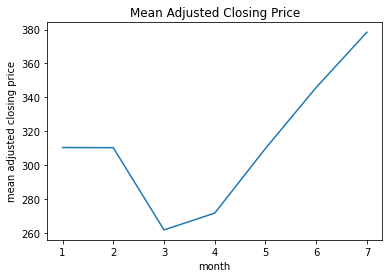

In [9]:
data_frame_of_month_and_mean_adjusted_closing_price.plot(
    kind = 'line',
    title = 'Mean Adjusted Closing Price',
    ylabel = "mean adjusted closing price",
    legend = None
)
import matplotlib.pyplot as plt
plt.show()